# Decision Trees

on the penguin dataset

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

%matplotlib inline

### Preparations

In [8]:
df = pd.read_csv('../data/all_penguins_clean.csv', index_col=0)
df.dropna(inplace=True)

FileNotFoundError: [Errno 2] No such file or directory: '../data/all_penguins_clean.csv'

#### 1. Inspect the size of the dataset

In [3]:
df.shape

(334, 14)

In [5]:
df

,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Real ID,Sex
studyName,,,,,,,,,,,,,,
PAL0708,1,Adelie,Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,11/11/07,39.1,18.7,181.0,3750.0,A_0,MALE
PAL0708,2,Adelie,Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,11/11/07,39.5,17.4,186.0,3800.0,A_1,FEMALE
PAL0708,3,Adelie,Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,11/16/07,40.3,18.0,195.0,3250.0,A_2,FEMALE
PAL0708,5,Adelie,Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,11/16/07,36.7,19.3,193.0,3450.0,A_4,FEMALE
PAL0708,6,Adelie,Anvers,Torgersen,"Adult, 1 Egg Stage",N3A2,Yes,11/16/07,39.3,20.6,190.0,3650.0,A_5,MALE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PAL0910,119,Gentoo,Anvers,Biscoe,"Adult, 1 Egg Stage",N38A1,No,12/1/09,47.2,13.7,214.0,4925.0,G_338,FEMALE
PAL0910,121,Gentoo,Anvers,Biscoe,"Adult, 1 Egg Stage",N39A1,Yes,11/22/09,46.8,14.3,215.0,4850.0,G_340,FEMALE
PAL0910,122,Gentoo,Anvers,Biscoe,"Adult, 1 Egg Stage",N39A2,Yes,11/22/09,50.4,15.7,222.0,5750.0,G_341,MALE


#### 2. Select the Species column to use as target

In [4]:
y = df["Species"]

#### 3. Select two columns to use as input features

In [54]:
X = df[["Culmen Depth (mm)", "Culmen Length (mm)"]]

#### 4. Plot the data

<AxesSubplot:xlabel='Culmen Depth (mm)', ylabel='Culmen Length (mm)'>

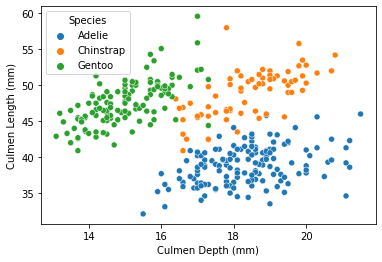

In [55]:
sns.scatterplot(x=X["Culmen Depth (mm)"], y=X["Culmen Length (mm)"], hue=y)

## Decision Tree from Scratch

#### 5. Make one prediction for every penguin

In [56]:
predictions = []
for i, row in X.iterrows():
    # i: index, row: values of a row as a pd.Series
    if row["Culmen Length (mm)"] < 42.4:
        predictions.append('Adelie')
    elif row["Culmen Depth (mm)"] > 16.8:
        predictions.append('Chinstrap')
    else:
        predictions.append('Gentoo')

#### 6. Calculate the accuracy of the model

In [57]:
from sklearn.metrics import accuracy_score

accuracy_score(y_true=y, y_pred=predictions)

0.9131736526946108

## Find the optimal separation with Scikit

#### 7. Train the model

In [87]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [88]:
m = DecisionTreeClassifier(max_depth=2)  # we allow that many questions
m.fit(df[["Culmen Depth (mm)", "Culmen Length (mm)", "Body Mass (g)", "Flipper Length (mm)"]], y)

DecisionTreeClassifier(max_depth=2)

In [93]:
df[["Culmen Depth (mm)", "Culmen Length (mm)", "Body Mass (g)", "Flipper Length (mm)"]]

,Culmen Depth (mm),Culmen Length (mm),Body Mass (g),Flipper Length (mm)
studyName,,,,
PAL0708,18.7,39.1,3750.0,181.0
PAL0708,17.4,39.5,3800.0,186.0
PAL0708,18.0,40.3,3250.0,195.0
PAL0708,19.3,36.7,3450.0,193.0
PAL0708,20.6,39.3,3650.0,190.0
...,...,...,...,...
PAL0910,13.7,47.2,4925.0,214.0
PAL0910,14.3,46.8,4850.0,215.0
PAL0910,15.7,50.4,5750.0,222.0


#### 8. Make predictions

In [89]:
ypred = m.predict(df[["Culmen Depth (mm)", "Culmen Length (mm)", "Body Mass (g)", "Flipper Length (mm)"]])

#### 9. Calculate the accuracy

In [90]:
accuracy_score(y_true=y, y_pred=ypred)

0.9640718562874252

## Plot the tree

#### 10. Plot the tree with according labels

In [1]:
plt.figure(figsize=(12, 8))
t = plot_tree(m, feature_names=m.criterion, class_names=m.classes_, filled=True)

NameError: name 'plt' is not defined